In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook

In [2]:
data_1 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/DeshelvingRate.dir/00046 - DeshelvingRate.csv', delimiter = ',')
data_2 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/ShelvingRate.dir/00193 - ShelvingRate.csv', delimiter = ',')

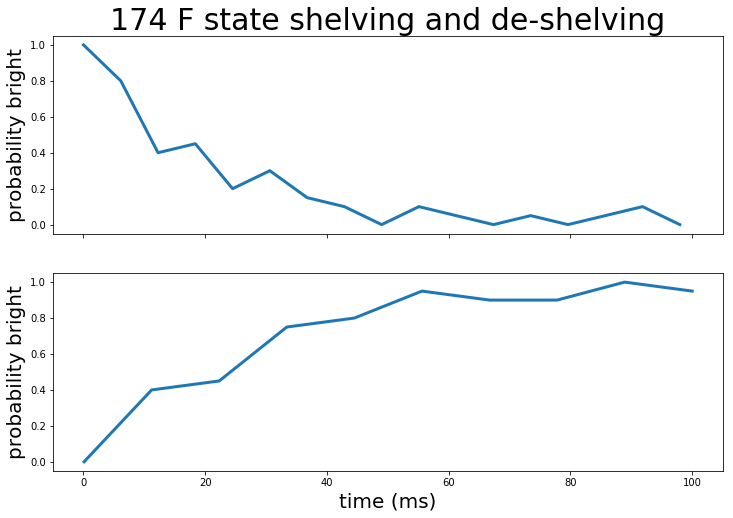

In [3]:
plt.figure(1, figsize=(12,8))
ax1 = plt.subplot(212)
plt.plot(data_1[:,0], data_1[:,1], linewidth=3)
plt.xlabel('time (ms)', fontsize=20)
plt.ylabel('probability bright', fontsize=20)
ax2 = plt.subplot(211, sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.plot(data_2[0::3,0], data_2[0::3,1], linewidth=3)
plt.ylabel('probability bright', fontsize=20)
plt.title('174 F state shelving and de-shelving', fontsize=30)
plt.savefig('/home/qsimexpcontrol/plots/shelving/411_shelving_deshelving.pdf')

In [5]:
data_2 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/ShelvingRate.dir/00352 - ShelvingRate.csv', delimiter = ',')

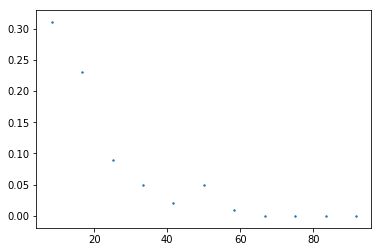

In [6]:
x_data = data_2[1:,0] 
y_data = data_2[1:,1]
plt.scatter(x_data, y_data, s=2)

16.88249230906252


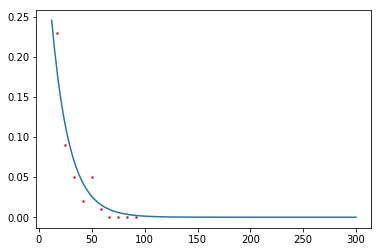

In [18]:
from scipy.optimize import curve_fit
def expfunc(x, b):
   return 0.5*np.exp(-1*x/b)

x = np.linspace(12, 300, 100)
expfit, pcov1 = curve_fit(expfunc, x_data[1:],y_data[1:], p0=[50])
print expfit[0]
plt.plot(x, 0.5*np.exp(-1*x/expfit[0]))
plt.scatter(x_data[1:], y_data[1:], s=2, color='red')

In [79]:
bright_data = np.zeros(150)
for item in ['88967', '88969' ,'88971', '88973' , '88975', '88977', '88979' ,
             '88981', '88983' ,'88985', '88987' , '88989', '88991', '88993' ,
             '88995', '88997' , '88999', '89001']:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ item + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 150 - len(y_data)), 'constant', constant_values=(0,0))
    bright_data += y_data

In [81]:
dark_data = np.zeros(150)
for item in ['88968', '88970' ,'88972', '88974' , '88976', '88978', '88980' ,
             '88982', '88984' ,'88986', '88988' , '88990', '88992', '88994' ,
             '88996', '88998' , '89000', '89002']:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ item + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 150 - len(y_data)), 'constant', constant_values=(0,0))
    dark_data += y_data

<IPython.core.display.Javascript object>


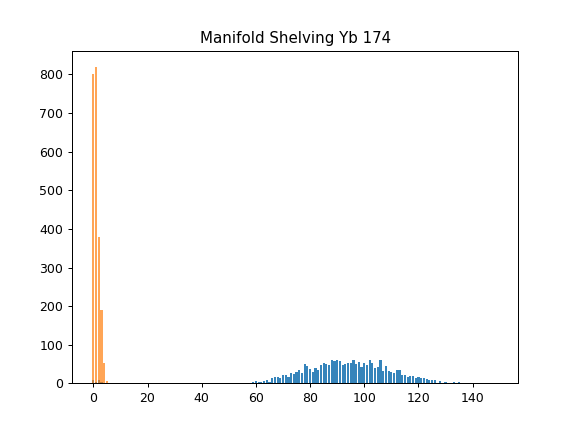

0.9982222222222222
0.988
0.9931111111111111


Text(0.5,1,'Manifold Shelving Yb 174')

In [126]:
threshold = 25
exp = 18*125
x = np.linspace(0,149,150)
plt.bar(x, bright_data, alpha=0.9)
plt.bar(x, dark_data, alpha = 0.7)
test = np.where(dark_data >= threshold)
dark_error = np.sum(dark_data[threshold:])/(18*125.0)
print 1 - dark_error
bright_error = np.sum(bright_data[:threshold])/(18*125.0)
print 1 - bright_error
print 1 - (bright_error + dark_error)/2.0
plt.title('Manifold Shelving Yb 174')
#plt.savefig('/home/qsimexpcontrol/plots/first_shelving.pdf')

<IPython.core.display.Javascript object>


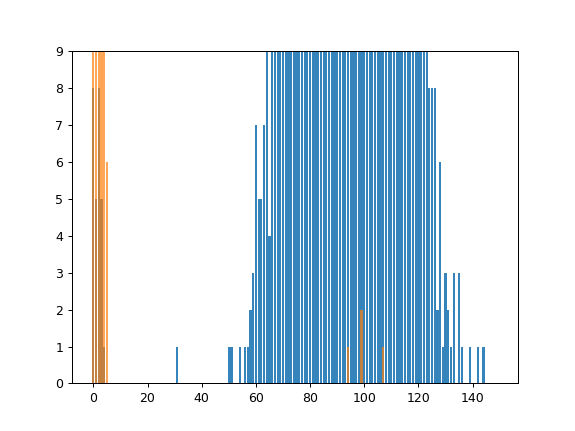

<BarContainer object of 150 artists>

In [123]:
plt.ylim([0,9])
plt.bar(x, bright_data, alpha=0.9)
plt.bar(x, dark_data, alpha = 0.7)

In [182]:
bright_data = np.zeros(300)
data_sets = list(range(89252, 89454, 2))
for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ str(item) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 300 - len(y_data)), 'constant', constant_values=(0,0))
    bright_data += y_data

In [183]:
data_sets = list(range(89253, 89455, 2))
dark_data = np.zeros(300)
for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ str(item) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 300 - len(y_data)), 'constant', constant_values=(0,0))
    dark_data += y_data

<IPython.core.display.Javascript object>


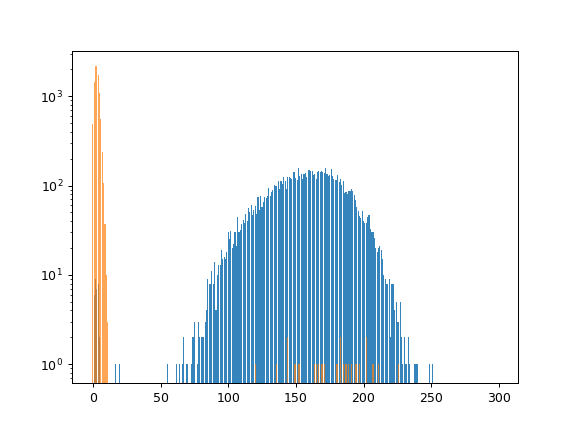

0.997029702970297
0.9968316831683168
0.9969306930693069


In [185]:
threshold = 15
exp = (len(data_sets))*100
x = np.linspace(0,299,300)
plt.bar(x, bright_data, alpha=0.9, log=True)
plt.bar(x, dark_data, alpha = 0.7, log=True)
test = np.where(dark_data >= threshold)
dark_error = np.sum(dark_data[threshold:])/(exp)
print 1 - dark_error
bright_error = np.sum(bright_data[:threshold])/(exp)
print 1 - bright_error
print 1 - (bright_error + dark_error)/2.0

<IPython.core.display.Javascript object>


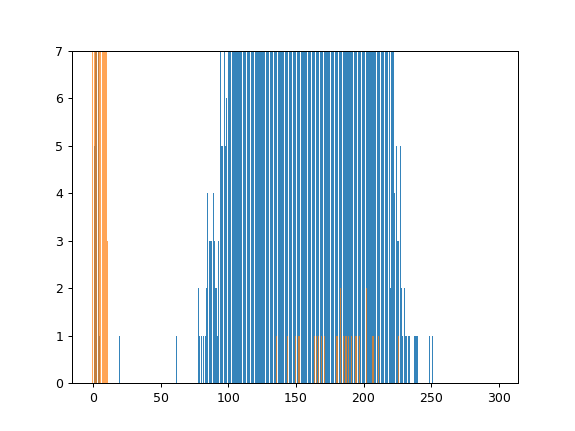

<BarContainer object of 300 artists>

In [169]:
plt.ylim([0,7])
plt.bar(x, bright_data, alpha=0.9)
plt.bar(x, dark_data, alpha = 0.7)

10470.0 10191.0
0.9997134670487106
0.9947993327445785
0.9972563998966446


<IPython.core.display.Javascript object>


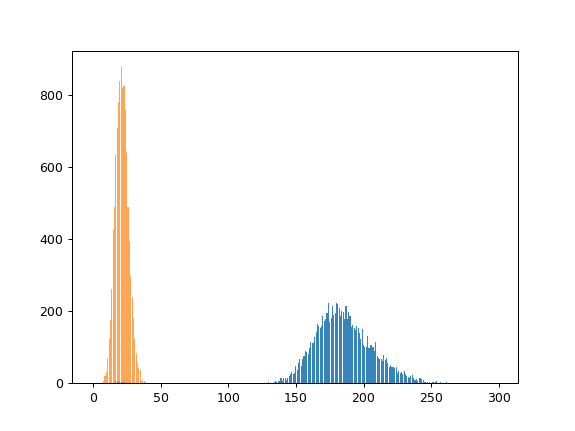

<BarContainer object of 300 artists>

In [243]:
bright_data = np.zeros(300)
data_sets = list(range(90428, 90848, 2))
for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ str(item) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 300 - len(y_data)), 'constant', constant_values=(0,0))
    bright_data += y_data

data_sets = list(range(90429, 90849, 2))
dark_data = np.zeros(300)
for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ str(item) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 300 - len(y_data)), 'constant', constant_values=(0,0))
    dark_data += y_data\

threshold = 50
exp_dark = np.sum(dark_data)
exp_bright = np.sum(bright_data)
x = np.linspace(0,299,300)
test = np.where(dark_data >= threshold)
dark_error = np.sum(dark_data[threshold:])/(exp_dark)
print exp_dark, exp_bright
print 1 - dark_error
bright_error = np.sum(bright_data[:threshold])/(exp_bright)
print 1 - bright_error
print 1 - (bright_error + dark_error)/2.0
plt.bar(x, bright_data, alpha=0.9)
plt.bar(x, dark_data, alpha = 0.7)

1124.0 1039.0
1.0
1.0
1.0


<IPython.core.display.Javascript object>


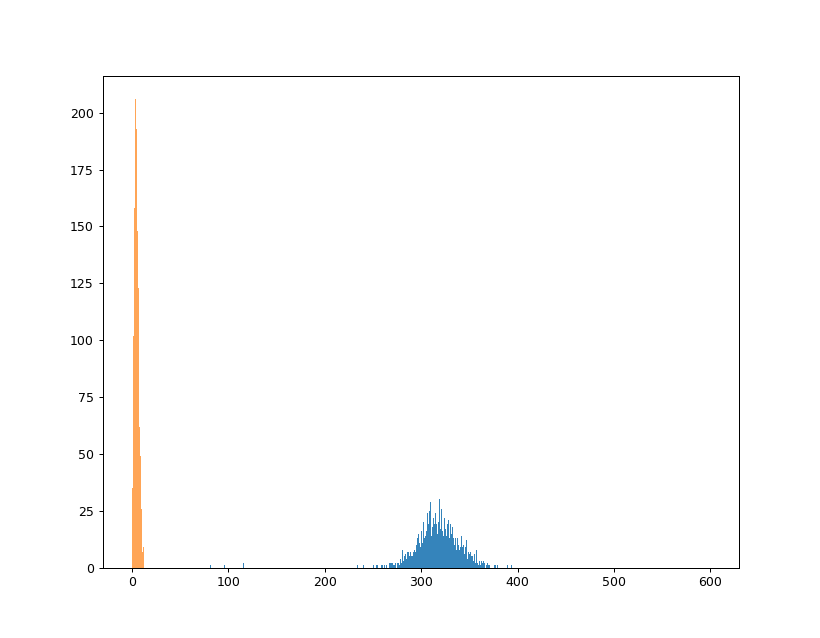

<BarContainer object of 600 artists>

In [271]:
bright_data = np.zeros(600)
data_sets = list(range(90951, 90997, 2))
for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ str(item) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 600 - len(y_data)), 'constant', constant_values=(0,0))
    bright_data += y_data

data_sets = list(range(90950, 90998, 2))
dark_data = np.zeros(600)
for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ str(item) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 600 - len(y_data)), 'constant', constant_values=(0,0))
    dark_data += y_data

threshold = 50
exp_dark = np.sum(dark_data)
exp_bright = np.sum(bright_data)
x = np.linspace(0,599,600)
dark_error = float(np.sum(dark_data[threshold:]))/float((exp_dark))
print exp_dark, exp_bright
print 1.0 - dark_error
bright_error = np.sum(bright_data[:threshold])/(exp_bright)
print 1.0 - bright_error
print 1 - (bright_error + dark_error)/2.0
plt.bar(x, bright_data, alpha=0.9, width=1.0)
plt.bar(x, dark_data, alpha = 0.7, width=1.0)
#plt.savefig('/home/qsimexpcontrol/plots/perfect_shelving.pdf')

52203.0 51382.0
0.999923376051 +- 3.8311974407601095e-05
1.0
0.9999616880255924 +- 3.8311974407601095e-05


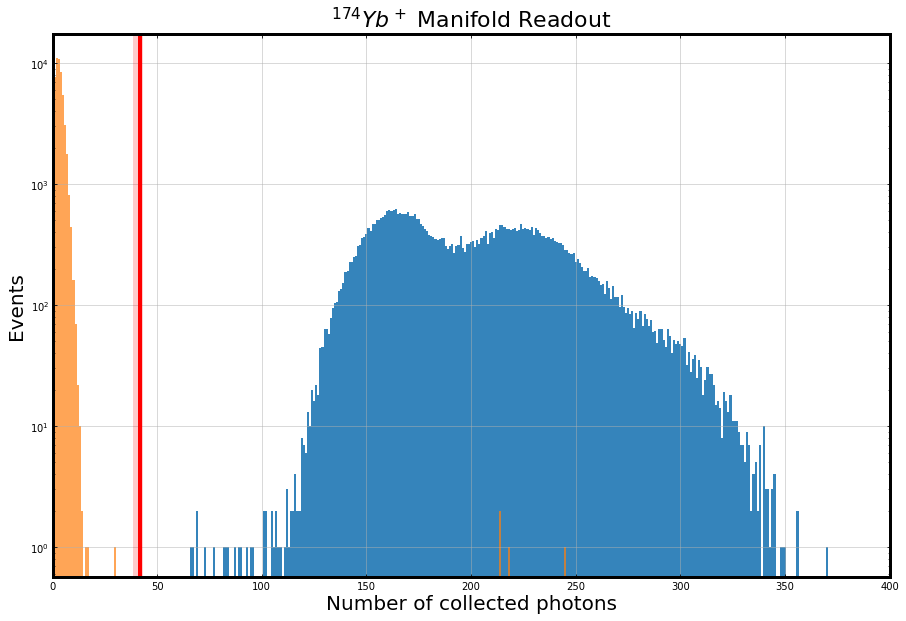

In [104]:
%matplotlib inline
mpl.style.use('conrad')
current_bright = 93728
current_dark = 93729
bright_data = np.zeros(600)
error_total = 4

data_sets = []
data_sets += list(range(91101, 91193, 2))
data_sets += list(range(91197, 91295, 2))
data_sets += list(range(91299, 91685, 2))
data_sets += list(range(92188, 92748, 2))
data_sets += list(range(92752, 92810, 2))
data_sets += list(range(92816, 93114, 2))
data_sets += list(range(93118, 93414, 2))
data_sets += list(range(93414, current_bright + 1, 2))

for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ str(item) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 600 - len(y_data)), 'constant', constant_values=(0,0))
    bright_data += y_data

data_sets = []
data_sets += list(range(91102, 91194, 2))
data_sets += list(range(91198, 91296, 2))
data_sets += list(range(91300, 91686, 2))
data_sets += list(range(92189, 92749, 2))
data_sets += list(range(92753, 92811, 2))
data_sets += list(range(92817, 93114, 2))
data_sets += list(range(93119, 93415, 2))
data_sets += list(range(93415, current_dark + 1, 2))

dark_data = np.zeros(600)
for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ str(item) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 600 - len(y_data)), 'constant', constant_values=(0,0))
    dark_data += y_data

threshold = 42
exp_dark = np.sum(dark_data)
exp_bright = np.sum(bright_data)
x = np.linspace(0,599,600)
dark_error = float(np.sum(dark_data[threshold:]))/float((exp_dark))
print exp_dark, exp_bright
print 1.0 - dark_error, '+-', np.sqrt(error_total)/exp_dark
bright_error = np.sum(bright_data[:threshold])/(exp_bright)
print 1.0 - bright_error
print 1 - (bright_error + dark_error)/2.0 , '+-', np.sqrt(error_total)/exp_dark
plt.xlim([0,400])
plt.bar(x, bright_data, alpha=0.9, width=1.0, log=True)
plt.bar(x, dark_data, alpha = 0.7, width=1.0, log=True)
plt.title(r'$^{174}Yb^+$ Manifold Readout', fontsize = 22)
plt.xlabel('Number of collected photons', fontsize = 20)
plt.ylabel('Events', fontsize = 20)
plt.axvline(x = threshold, color='red', linewidth = 4)
plt.axvline(x = 41, color='red', linewidth = 10, alpha = 0.2)
#plt.savefig('/home/qsimexpcontrol/plots/one_error.pdf')

<IPython.core.display.Javascript object>


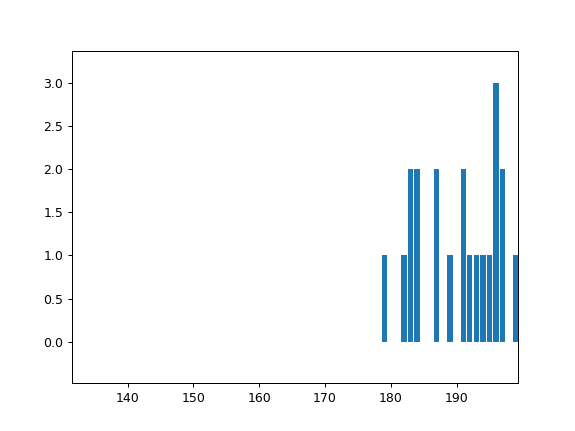

<BarContainer object of 267 artists>

9672.0 9651.0
0.999793217535 +- 0.00010339123242349049
1.0
0.9998966087675765 +- 0.00010339123242349049


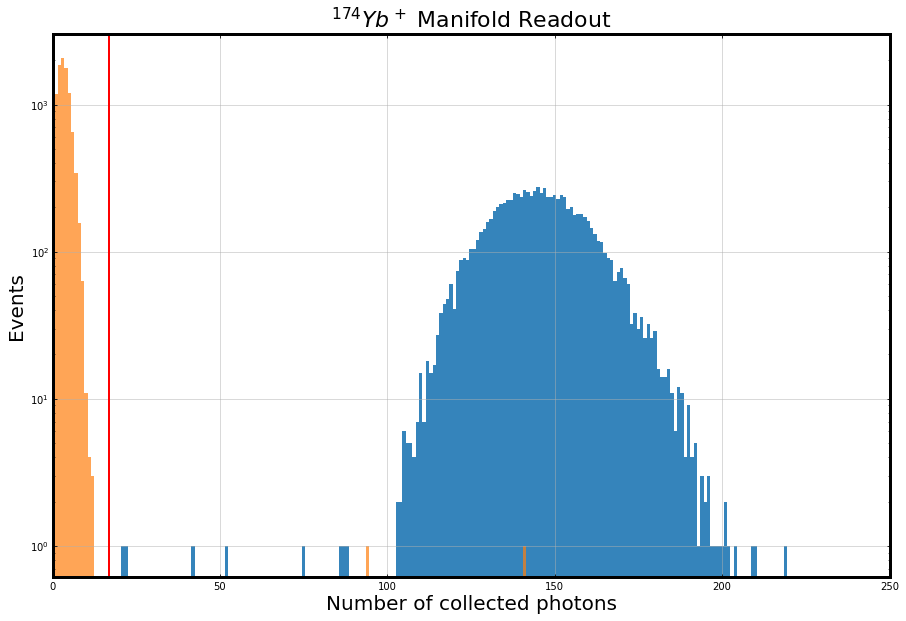

In [159]:
%matplotlib inline
mpl.style.use('conrad')
current = 232
bright_data = np.zeros(600)
error_total = 1

data_sets = []
data_sets += list(range(1, 190))
data_sets += list(range(225, current + 1))

for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/manifold_data_bright.dir/'+ str(item).zfill(5) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 600 - len(y_data)), 'constant', constant_values=(0,0))
    bright_data += y_data

dark_data = np.zeros(600)
for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/manifold_data_dark.dir/'+ str(item).zfill(5) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 600 - len(y_data)), 'constant', constant_values=(0,0))
    dark_data += y_data

threshold = 17
exp_dark = np.sum(dark_data)
exp_bright = np.sum(bright_data)
x = np.linspace(0,599,600)
dark_error = float(np.sum(dark_data[threshold:]))/float((exp_dark))
print exp_dark, exp_bright
print 1.0 - dark_error, '+-', np.sqrt(error_total)/exp_dark
bright_error = np.sum(bright_data[:threshold])/(exp_bright)
print 1.0 - bright_error
print 1 - (bright_error + dark_error)/2.0 , '+-', np.sqrt(error_total)/exp_dark
plt.xlim([0,250])
plt.bar(x, bright_data, alpha=0.9, width=1.0, log=True)
plt.bar(x, dark_data, alpha = 0.7, width=1.0,log=True)
plt.title(r'$^{174}Yb^+$ Manifold Readout', fontsize = 22)
plt.xlabel('Number of collected photons', fontsize = 20)
plt.ylabel('Events', fontsize = 20)
plt.axvline(x = threshold, color='red', linewidth = 2)
#plt.axvline(x = 41, color='red', linewidth = 10, alpha = 0.2)

9901.0 9856.0
0.999798000202 +- 0.00014283542696425566
1.0
0.9998990001009999 +- 0.00014283542696425566


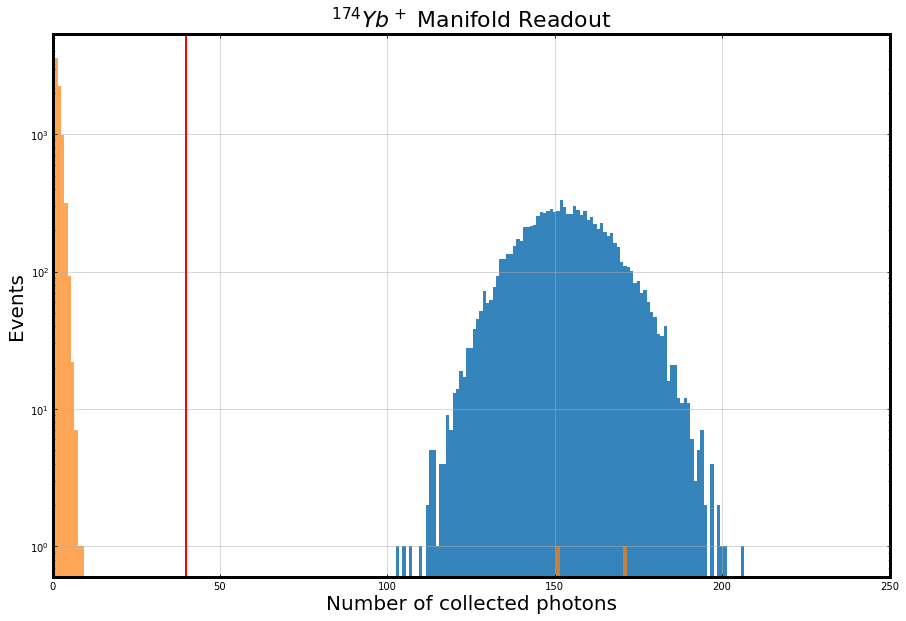

In [200]:
%matplotlib inline
mpl.style.use('conrad')
current = 542
bright_data = np.zeros(600)
error_total = 2

data_sets = []
data_sets += list(range(340, 413))
data_sets += list(range(414, current + 1))

for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/manifold_data_bright.dir/'+ str(item).zfill(5) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 600 - len(y_data)), 'constant', constant_values=(0,0))
    bright_data += y_data

dark_data = np.zeros(600)
for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/manifold_data_dark.dir/'+ str(item).zfill(5) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 600 - len(y_data)), 'constant', constant_values=(0,0))
    dark_data += y_data

threshold = 40
exp_dark = np.sum(dark_data)
exp_bright = np.sum(bright_data)
x = np.linspace(0,599,600)
dark_error = float(np.sum(dark_data[threshold:]))/float((exp_dark))
print exp_dark, exp_bright
print 1.0 - dark_error, '+-', np.sqrt(error_total)/exp_dark
bright_error = np.sum(bright_data[:threshold])/(exp_bright)
print 1.0 - bright_error
print 1 - (bright_error + dark_error)/2.0 , '+-', np.sqrt(error_total)/exp_dark
plt.xlim([0,250])
plt.bar(x, bright_data, alpha=0.9, width=1.0, log=True)
plt.bar(x, dark_data, alpha = 0.7, width=1.0,log=True)
plt.title(r'$^{174}Yb^+$ Manifold Readout', fontsize = 22)
plt.xlabel('Number of collected photons', fontsize = 20)
plt.ylabel('Events', fontsize = 20)
plt.axvline(x = threshold, color='red', linewidth = 2)
#plt.savefig('/home/qsimexpcontrol/plots/saturday.pdf')

21864.0 21793.0
0.99981705086 +- 0.00010227167844400795
1.0
0.9999085254299305 +- 0.00010227167844400795


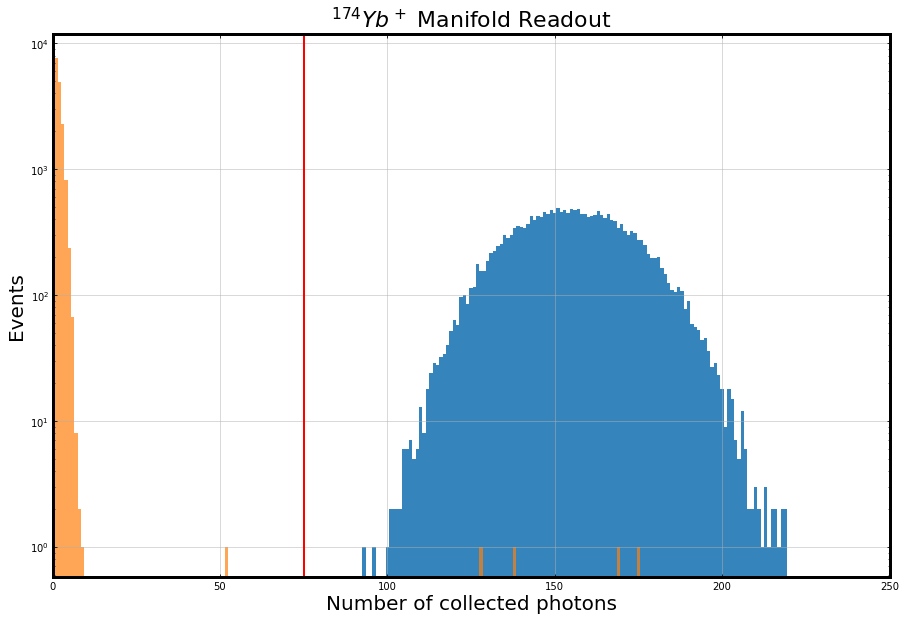

In [234]:
%matplotlib inline
mpl.style.use('conrad')
current = 990
bright_data = np.zeros(600)
error_total = 5

data_sets = []
data_sets += list(range(543, current + 1))

for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/manifold_data_bright.dir/'+ str(item).zfill(5) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 600 - len(y_data)), 'constant', constant_values=(0,0))
    bright_data += y_data

dark_data = np.zeros(600)
for item in data_sets:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/manifold_data_dark.dir/'+ str(item).zfill(5) + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 600 - len(y_data)), 'constant', constant_values=(0,0))
    dark_data += y_data

threshold = 75
exp_dark = np.sum(dark_data)
exp_bright = np.sum(bright_data)
x = np.linspace(0,599,600)
dark_error = float(np.sum(dark_data[threshold:]))/float((exp_dark))
print exp_dark, exp_bright
print 1.0 - dark_error, '+-', np.sqrt(error_total)/exp_dark
bright_error = np.sum(bright_data[:threshold])/(exp_bright)
print 1.0 - bright_error
print 1 - (bright_error + dark_error)/2.0 , '+-', np.sqrt(error_total)/exp_dark
plt.xlim([0,250])
plt.bar(x, bright_data, alpha=0.9, width=1.0, log=True)
plt.bar(x, dark_data, alpha = 0.7, width=1.0,log=True)
plt.title(r'$^{174}Yb^+$ Manifold Readout', fontsize = 22)
plt.xlabel('Number of collected photons', fontsize = 20)
plt.ylabel('Events', fontsize = 20)
plt.axvline(x = threshold, color='red', linewidth = 2)